# How to evaluate XGBoost model with learning curves


***************Hoe to visualise XGBoost model with learning curves****************
Accuracy: 77.95%


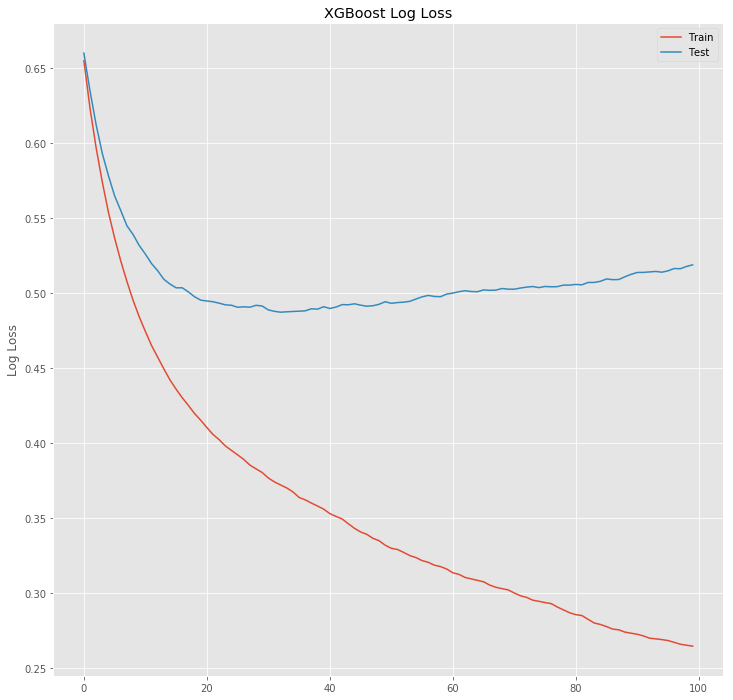

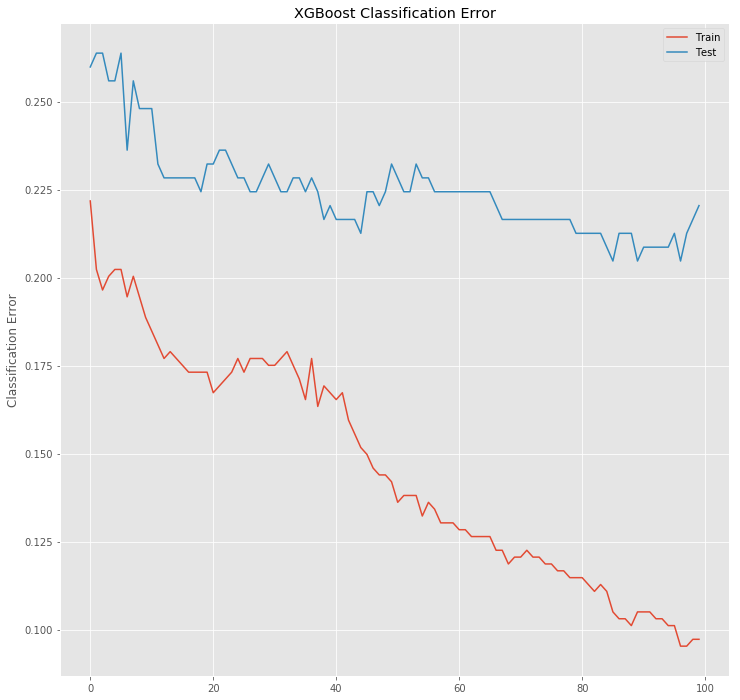

In [2]:
## How to evaluate XGBoost model with learning curves - source MLM
def Snippet_189(): 
    print()
    print(format('Hoe to visualise XGBoost model with learning curves','*^82'))    
    import warnings
    warnings.filterwarnings("ignore")
    
    # load libraries
    from numpy import loadtxt
    from xgboost import XGBClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    from matplotlib import pyplot
    import matplotlib.pyplot as plt    
    
    plt.style.use('ggplot')    
    
    # load data
    dataset = loadtxt('pima.indians.diabetes.data.csv', delimiter=",")
    
    # split data into X and y
    X = dataset[:,0:8]
    Y = dataset[:,8]
    
    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
    
    # fit model no training data
    model = XGBClassifier()
    eval_set = [(X_train, y_train), (X_test, y_test)]
    model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=False)
    
    # make predictions for test data
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    
    # retrieve performance metrics
    results = model.evals_result()
    epochs = len(results['validation_0']['error'])
    x_axis = range(0, epochs)
    
    # plot log loss
    fig, ax = pyplot.subplots(figsize=(12,12))
    ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
    ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
    ax.legend()
    pyplot.ylabel('Log Loss')
    pyplot.title('XGBoost Log Loss')
    pyplot.show()
    
    # plot classification error
    fig, ax = pyplot.subplots(figsize=(12,12))
    ax.plot(x_axis, results['validation_0']['error'], label='Train')
    ax.plot(x_axis, results['validation_1']['error'], label='Test')
    ax.legend()
    pyplot.ylabel('Classification Error')
    pyplot.title('XGBoost Classification Error')
    pyplot.show()
    
Snippet_189()